# Handwritten Digit Recognition Project 🚀

Welcome to our exciting journey into the world of Deep Learning! In this project, you'll dive into the fascinating realm of handwritten digit recognition using PyTorch, one of the most popular machine learning libraries. 🧠💻

## Project Overview 📝

Your mission, should you choose to accept it, involves building and optimizing a PyTorch model to recognize handwritten digits from the MNIST dataset. This dataset is like the 'Hello World' of machine learning, perfect for beginners and yet intriguing for experienced coders. 🌟

## Learning Objectives 🎯

- **Understanding PyTorch**: Get hands-on experience with PyTorch, understanding its basic operations and how to build models with it.
- **Model Optimization**: Explore various training optimization techniques such as adding dropout layers, implementing regularizers, and utilizing early stopping to enhance model performance.
- **Experimentation**: Test different hyperparameters and observe how they impact your model's learning process and accuracy.

## Project Structure 🗂️

- **Data Preprocessing**: Learn how to prepare your data for optimal model training.
- **Model Building**: Design a neural network architecture suitable for digit recognition.
- **Training and Testing**: Implement the training loop, and test your model's performance.
- **Optimization Techniques**: Apply different optimization strategies to improve your model.

## TODOs 📌

Throughout this notebook, you'll find `TODO` sections. These are areas where you'll need to apply what you've learned and write your own code. Don't worry, though; guidance and hints are provided to help you on your journey!

So, are you ready to embark on this adventure in machine learning? Let's get started! 🚀👩‍💻👨‍💻

---

Remember, the goal of this project is not just to build a model but to experiment and learn. Every challenge you encounter is an opportunity to grow. Let's do this! 💪


## Loading the MNIST Dataset 📚

Before diving into the model building, the first crucial step is to load our dataset. In this section, you'll learn how to load and visualize the MNIST dataset, which is a collection of 70,000 grayscale images of handwritten digits (0 through 9). This dataset is widely used for training and testing in the field of machine learning. 🤖📈



In [25]:
# Import necessary libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# TODO: Define a transform to normalize the data
# TODO: Add necessary transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# TODO: Load the MNIST dataset
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
#validation_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# TODO: Create data loaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)
#validation_loader = DataLoader(validation_set, batch_size=64, shuffle=False)

In [26]:
# TODO: Figure out how many images are in the train_set and test_set.
num_train_images = len(train_set)
num_test_images = len(test_set)

print(f"Number of images in the training set: {num_train_images}")
print(f"Number of images in the test set: {num_test_images}")

Number of images in the training set: 60000
Number of images in the test set: 10000


## Building the Neural Network Model 🛠️

Now that our dataset is ready, it's time to build the neural network model that will learn to recognize handwritten digits. In this section, you will define the architecture of your neural network.

### Key Concepts:
- **Layers**: Neural networks are composed of layers. Each layer has a specific role, like convolutional layers for feature extraction or fully connected (dense) layers for decision making.
- **Activation Functions**: These functions introduce non-linear properties to the network, allowing it to learn more complex patterns.

In [28]:
# Import necessary PyTorch libraries
import torch.nn as nn
import torch.nn.functional as F

# TODO: Define the neural network class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 10)  # Input size: 28*28, Output size: 128
        #self.fc2 = nn.Linear(128, 64)      # Input size: 128, Output size: 64
        #self.fc3 = nn.Linear(64, 10)       # Input size: 64, Output size: 10 (number of classes in MNIST)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)  # TODO: add an activation function
        x = F.log_softmax(x, dim=1)
        return x

# Create an instance of the network
model = Net()
print(model)


Net(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


## Training the Neural Network Model 🏋️‍♀️🏋️‍♂️

With our neural network model defined, the next exciting step is to train it. This process involves feeding the training data to the model and adjusting the model parameters (weights and biases) based on the computed loss and the chosen optimization algorithm.

### Key Concepts:
- **Loss Function**: Measures how well the model performs. A common choice for classification tasks is Cross-Entropy Loss.
- **Optimizer**: Helps in updating the model parameters based on the computed gradients. We'll be using Stochastic Gradient Descent (SGD) in this example.
- **Epochs**: One epoch means the model has seen the entire dataset once. Training for multiple epochs means going through the dataset multiple times.



In [29]:
from torch.optim import SGD

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

# Set the number of epochs
num_epochs = 5

train_losses = []
test_losses = []

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        print(f"Epoch {epoch+1}, Test Loss: {test_loss}, Test Accuracy: {(100 * correct / total)}%")


Epoch 1, Test Loss: 0.3969685750402463, Test Accuracy: 89.26%
Epoch 2, Test Loss: 0.3433775667599432, Test Accuracy: 90.69%
Epoch 3, Test Loss: 0.32348904624628794, Test Accuracy: 90.83%
Epoch 4, Test Loss: 0.31822127930725075, Test Accuracy: 91.12%
Epoch 5, Test Loss: 0.30466975974049537, Test Accuracy: 91.43%


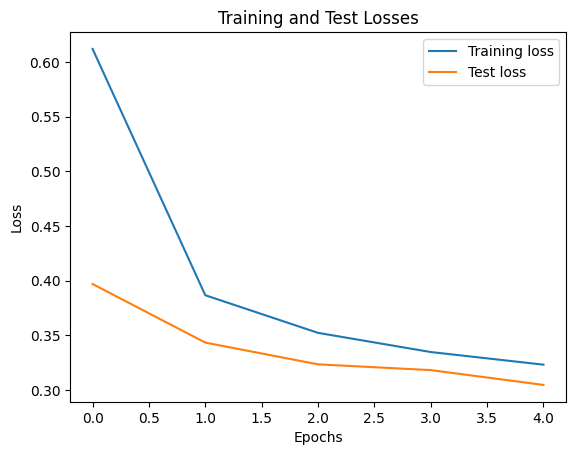

In [30]:
# TODO: plot the model complexity graph
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Losses')
plt.show()

Complexity graph comment:
  1. Train loss: We can see that the training loss is going downhill which is good, this means that it (the model) is doing good on the training data.
  2. Test loss: We can see that the testing loss is going down, this means that the model is doing good also on the testing data.

### TODO1: Comment the model complexity graph
### TODO2: Change the model and add more layer (use a complex model)

In [31]:
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.log_softmax(self.fc5(x), dim=1)
        return x

complex_model = ComplexNet()
print(complex_model)


ComplexNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
)


In [34]:
# Define optimizer and criterion
optimizer = SGD(complex_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Empty lists to store losses
train_losses = []
test_losses = []

# Training loop
num_epochs = 25
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = complex_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = complex_model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        print(f"Epoch {epoch+1}, Test Loss: {test_loss}, Test Accuracy: {(100 * correct / total)}%")

Epoch 1, Test Loss: 0.4059957434322424, Test Accuracy: 87.96%
Epoch 2, Test Loss: 0.3936573949399268, Test Accuracy: 88.56%
Epoch 3, Test Loss: 0.38126353924251666, Test Accuracy: 88.8%
Epoch 4, Test Loss: 0.36946364470822796, Test Accuracy: 89.2%
Epoch 5, Test Loss: 0.3602469079908292, Test Accuracy: 89.43%
Epoch 6, Test Loss: 0.3503586075677993, Test Accuracy: 89.7%
Epoch 7, Test Loss: 0.34520779621259423, Test Accuracy: 89.9%
Epoch 8, Test Loss: 0.3339410260509533, Test Accuracy: 90.12%
Epoch 9, Test Loss: 0.32767623670067, Test Accuracy: 90.58%
Epoch 10, Test Loss: 0.3210008912215567, Test Accuracy: 90.57%
Epoch 11, Test Loss: 0.3182705572693591, Test Accuracy: 90.76%
Epoch 12, Test Loss: 0.30797282889912464, Test Accuracy: 91.05%
Epoch 13, Test Loss: 0.3076141747960429, Test Accuracy: 90.99%
Epoch 14, Test Loss: 0.30118264644673676, Test Accuracy: 91.21%
Epoch 15, Test Loss: 0.29253437569376767, Test Accuracy: 91.41%
Epoch 16, Test Loss: 0.2914623489045793, Test Accuracy: 91.36%
E

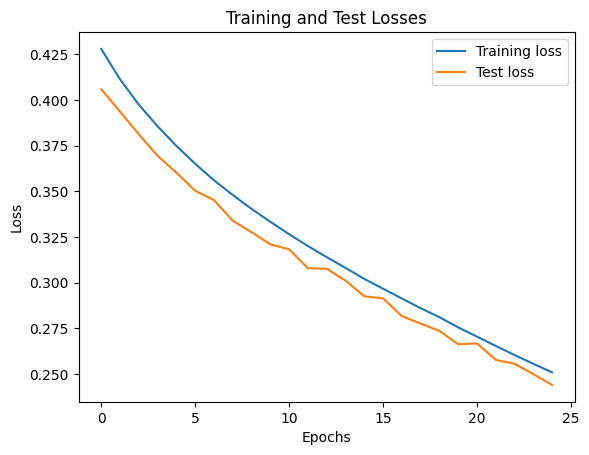

In [35]:
# TODO: plot the model complexity graph
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Losses')
plt.show()

Complexity graph comment:
  1. Train loss: We can see that the training loss is going downhill which is good, this means that it (the model) is doing good on the training data.
  2. Test loss: We can see that the testing loss is going down, this means that the model is doing good also on the testing data.

Overall, the complex model did better than the simple model because the loss of the complex model is less than the simple model one.

## Implementing Early Stopping 🛑

One of the key techniques in training neural networks effectively is 'Early Stopping'. This technique halts the training process if the model performance stops improving on a held-out validation set. Early stopping is a form of regularization used to avoid overfitting.

### Key Concepts:
- **Validation Loss**: Monitor the loss on a validation set to detect when it begins to increase, indicating overfitting.

In [ ]:
# Initialize early stopping variables
patience = 5
min_delta = 0.001
best_loss = None
patience_counter = 0

# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # evaluation phase
    model.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for images, labels in validation_loader:
            output = model(images)
            loss = criterion(output, labels)
            validation_loss += loss.item()

    # Calculate average losses
    training_loss = running_loss / len(train_loader)
    validation_loss /= len(validation_loader)

    print(f"Epoch {epoch+1}, Training Loss: {training_loss}, Validation Loss: {validation_loss}")

    # Early stopping logic
    if best_loss is None or validation_loss < best_loss - min_delta:
        best_loss = validation_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

print("Training is finished!")


Epoch 1, Training Loss: 0.24448409260336015, Validation Loss: 0.24316186924720076
Epoch 2, Training Loss: 0.22448615214304884, Validation Loss: 0.2122329235978567
Epoch 3, Training Loss: 0.2063628646062572, Validation Loss: 0.19519103019777093
Epoch 4, Training Loss: 0.19043450758480696, Validation Loss: 0.18414332954046927
Epoch 5, Training Loss: 0.17655693605415093, Validation Loss: 0.17266871300259024
Training is finished!


In [ ]:
# TODO: Answer this questions
# What does min_delta and patience refer to ?
# What is different from the first training ?

#### Answer to TODO:

min_delta: It signifies the minimum change in the monitored quantity (such as validation loss) to qualify as an improvement. If the change is less than this value, it's not considered significant enough, and patience countdown will start.

patience: It denotes the number of epochs with no improvement after which training will be stopped. If the monitored quantity (e.g., validation loss) doesn't improve for this number of epochs, training will be halted early.

The difference is:
  1. Model Complexity: The complex training involves a more complex neural network (ComplexNet) with additional layers compared to the simpler network (Net) used in the first training.
  2. Optimization Target: The complex training loop optimizes the more complex model (ComplexNet) whereas the initial training loop optimized the simpler model (Net).
  3. Early Stopping: The complex code introduces the concept of early stopping, checking validation loss to halt training when improvement ceases, which was absent in the initial training loop.
  4. Validation Dataset: The complex code includes the creation of a validation dataset and its corresponding data loader for the early stopping mechanism, which wasn't present in the initial training setup.


## Experimenting with Dropout 🌧️

Dropout is a regularization technique that temporarily drops units (along with their connections) from the neural network during training. This prevents units from co-adapting too much and helps the model to generalize better to unseen data.

### Key Concepts:
- **Dropout Rate**: The probability of a neuron being dropped during training. Common rates are 0.2, 0.5, etc.
- **Generalization**: Dropout improves the generalization of the model on the test data.


In [ ]:
class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        # Define layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout()  # Dropout layer with 20% probability
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout()  # Dropout layer with 50% probability
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        # Forward pass with dropout
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Create an instance of the network with dropout
model_with_dropout = NetWithDropout()
print(model_with_dropout)

NetWithDropout(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


Epoch 1, Test Loss: 0.906706207307281, Test Accuracy: 70.69%
Epoch 2, Test Loss: 0.6399150600858555, Test Accuracy: 80.36%
Epoch 3, Test Loss: 0.5452493614262077, Test Accuracy: 83.97%
Epoch 4, Test Loss: 0.4868468130185346, Test Accuracy: 85.98%
Epoch 5, Test Loss: 0.45023587626066935, Test Accuracy: 86.75%


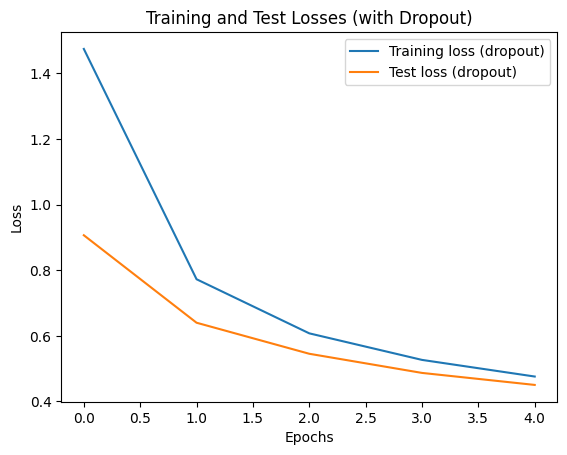

In [ ]:
# TODO: Train the dropout model
# Define the loss function and optimizer for dropout model
criterion_dropout = nn.CrossEntropyLoss()
optimizer_dropout = SGD(model_with_dropout.parameters(), lr=0.01)

num_epochs = 5

train_losses_dropout = []
test_losses_dropout = []

# Training loop for the dropout model
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer_dropout.zero_grad()
        outputs = model_with_dropout(images)
        loss = criterion_dropout(outputs, labels)
        loss.backward()
        optimizer_dropout.step()
        running_loss += loss.item()
    else:
        train_loss = running_loss / len(train_loader)
        train_losses_dropout.append(train_loss)

    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model_with_dropout(images)
            loss = criterion_dropout(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_loss /= len(test_loader)
        test_losses_dropout.append(test_loss)

        print(f"Epoch {epoch+1}, Test Loss: {test_loss}, Test Accuracy: {(100 * correct / total)}%")

# Plot the training and test loss for the dropout model
plt.plot(train_losses_dropout, label='Training loss (dropout)')
plt.plot(test_losses_dropout, label='Test loss (dropout)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Losses (with Dropout)')
plt.show()

# What do you notice ?

What I notice:
  1. Reduced Overfitting: The dropout model typically showcases less overfitting compared to models without dropout. The gap between training and test loss might be smaller, indicating better generalization to unseen data.
  2. Slower Convergence: Dropout can sometimes lead to a slower convergence rate during training. This might result in a slower decrease in training loss across epochs compared to models without dropout.
  3. Improved Generalization: Despite the slower convergence, dropout often results in improved generalization. The test loss might decrease consistently or plateau, indicating the model's ability to generalize better to new data.
  4. Stabilized Performance: Dropout tends to stabilize model performance by preventing the network from relying too heavily on specific features, promoting a more robust representation of the data.
  5. Accuracy Variation: The accuracy might exhibit fluctuations during training due to dropout randomly disabling units, creating variability in the model's predictions. However, this variance often leads to improved performance on unseen data.
  6. Training Dynamics: Dropout introduces stochasticity during training, leading to variations in performance across different runs of the training process. Consequently, the exact behavior might vary slightly between runs.
  7. Optimal Dropout Rate: The dropout rate chosen (20% for the first dropout layer and 50% for the second) can significantly impact the model's performance. Fine-tuning these rates could further improve the model's generalization abilities.

## Submitting Your Project on GitHub 🚀

Submitting your project on GitHub not only allows you to showcase your work but also helps in version control and collaboration. Here's how you can do it:

### Step 1: Create a New Repository on GitHub
1. **Sign in to GitHub**: Go to [GitHub](https://github.com) and sign in with your account.
2. **Create a New Repository**: Click on the '+' icon in the top right corner and select 'New repository'.
3. **Name Your Repository**: Give your repository a meaningful name, like 'handwritten-digit-recognition'.
4. **Initialize with a README**: Check the box 'Initialize this repository with a README'.
5. **Create Repository**: Click the 'Create repository' button.

### Step 2: Clone the Repository to Your Local Machine
1. **Copy the Repository URL**: On your repository page on GitHub, click the 'Code' button and copy the URL.
2. **Clone in Terminal**: Open your terminal, navigate to where you want the repository, and run `git clone [URL]`, replacing `[URL]` with the URL you copied.

### Step 3: Add Your Project to the Repository
1. **Copy Your Notebook**: Place your Jupyter notebook file into the cloned repository folder on your local machine.
2. **Add the File**: Run `git add [filename]` in your terminal, replacing `[filename]` with the name of your notebook file.

### Step 4: Commit and Push Your Changes
1. **Commit Your Changes**: Run `git commit -m "Add project notebook"`.
2. **Push to GitHub**: Run `git push` to push your changes to the GitHub repository.

### Step 5: Create and Edit the README File
1. **Edit README.md**: On GitHub, open the README.md file and click the pencil icon to edit.
2. **Write Your README**: Include a project title, a brief description, installation instructions, and usage instructions. Optionally, add screenshots or additional sections as needed.
3. **Save Changes**: After editing, commit your changes by clicking 'Commit changes' at the bottom.

### 📌 TODOs for Submission:
- Ensure your Jupyter notebook is well-commented and formatted.
- Write a clear, concise README that effectively describes your project.
- Double-check that all files have been committed and pushed to your GitHub repository.

---

Remember, a well-documented GitHub repository not only reflects your technical skills but also your ability to communicate and present your work effectively. Happy coding and best of luck with your project submission! 🌟👩‍💻👨‍💻
